# covariance matrix

In [1]:
import numpy as np

x_1 = np.array([2, 1])
x_2 = np.array([2, 4])
x_3 = np.array([4, 1])
x_4 = np.array([4, 3])

X_array = np.array([x_1, x_2, x_3, x_4])
X_mean = np.mean(X_array, axis=0)
X_array = X_array - X_mean
X_array   # 원점으로 돌려주기

array([[-1.  , -1.25],
       [-1.  ,  1.75],
       [ 1.  , -1.25],
       [ 1.  ,  0.75]])

In [2]:
# 1, 0에 투영하기
u = np.array([1, 0])

np.dot(X_array, u)

array([-1., -1.,  1.,  1.])

In [3]:
# 공분산 행렬
np.dot(X_array.T, X_array) / 4

array([[ 1.    , -0.25  ],
       [-0.25  ,  1.6875]])

In [4]:
# 고유값, 고유벡터 
np.linalg.eig(np.dot(X_array.T, X_array) / 4)

(array([0.91870405, 1.76879595]),
 array([[-0.95098267,  0.30924417],
        [-0.30924417, -0.95098267]]))

### 6.1 [예제 6-1]에서 초 기 군 집 중 심 을 z_1 = x_2, z_2 = x_3, z_3 = x_7 로 다 시 설 정 했 을 때 k - 평 균 의 동작을예제처럼보이시오. 다중시작을사용한다면둘중어느해를취할지판단하시오.
<p float="left">
  <img src="image-3.png" alt="Alt text" width="40%" /> 
  <img src="image-1.png" alt="Alt text" width="40%" />
</p>

In [15]:
from sklearn.cluster import KMeans

def compare_iter(X_array, Z_array) ->  None:
    kmeans1 = KMeans(n_clusters=3, init=Z_array, max_iter=1, n_init=1).fit(X_array)
    label1 = kmeans1.labels_
    center1 = kmeans1.cluster_centers_

    kmeans2 = KMeans(n_clusters=3, init=center1, max_iter=1, n_init=1).fit(X_array)
    label2 = kmeans2.labels_
    center2 = kmeans2.cluster_centers_


    print(
        f"# first cal:\n"
        f"- labels: \n{label1}\n"
        f"- center: \n{center1}\n"
    )

    print(
        f"# second cal:\n"
        f"- labels: \n{label2}\n"
        f"- center: \n{center2}\n"
    )


In [16]:
import numpy as np

# 예제 6-1
x_1 = [18, 5]
x_2 = [20, 9]
x_3 = [20, 14]
x_4 = [20, 17]
x_5 = [5, 15]
x_6 = [9, 15]
x_7 = [6, 20]

X_array = np.array([x_1, x_2, x_3, x_4, x_5, x_6, x_7])
Z_array = np.array([x_1, x_2, x_3])
Z_array2 = np.array([x_2, x_3, x_7])    # 문제 6-1 중심점


print("=== 예제 6 - 1 ===")
compare_iter(X_array, Z_array)
print("=== 문제 6 - 1 ===")
compare_iter(X_array, Z_array2)


=== 예제 6 - 1 ===
# first cal:
- labels: 
[0 1 1 1 2 2 2]
- center: 
[[18.   5. ]
 [20.   9. ]
 [12.  16.2]]

# second cal:
- labels: 
[0 1 1 1 2 2 2]
- center: 
[[18.          5.        ]
 [20.         13.33333333]
 [ 6.66666667 16.66666667]]

=== 문제 6 - 1 ===
# first cal:
- labels: 
[0 0 1 1 2 2 2]
- center: 
[[19.          7.        ]
 [20.         15.5       ]
 [ 6.66666667 16.66666667]]

# second cal:
- labels: 
[0 0 1 1 2 2 2]
- center: 
[[19.          7.        ]
 [20.         15.5       ]
 [ 6.66666667 16.66666667]]



<Axes: >

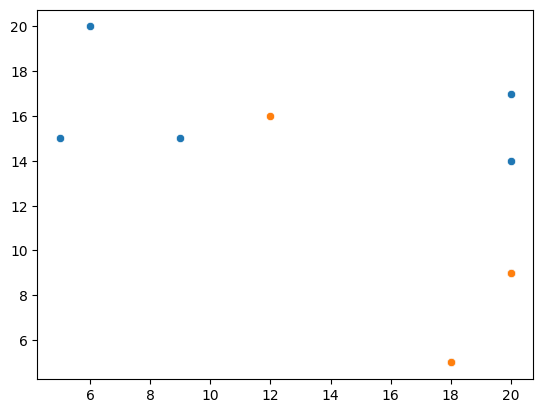

In [14]:
import seaborn as sns

sns.scatterplot(x=X_array[:, 0], y=X_array[:, 1])
sns.scatterplot(x=Z_array[:, 0], y=Z_array[:, 1])


### 6.3 [예제6-1]의 초기 군집 중심과 문제 1 의 초기 군집 중심 각각에 k-medbids 알고리즘을 적용하시오.

In [6]:
from sklearn_extra.cluster import KMedoids

def compare_iter_medoids(X_array, Z_array):
    kmeans1 = KMedoids(n_clusters=3, init=Z_array, max_iter=1).fit(X_array)
    label1 = kmeans1.labels_
    center1 = kmeans1.cluster_centers_

    kmeans2 = KMedoids(n_clusters=3, init=center1, max_iter=1).fit(X_array)
    label2 = kmeans2.labels_
    center2 = kmeans2.cluster_centers_


    print(
        f"# first cal:\n"
        f"- labels: \n{label1}\n"
        f"- center: \n{center1}\n"
    )

    print(
        f"# second cal:\n"
        f"- labels: \n{label2}\n"
        f"- center: \n{center2}\n"
    )

In [7]:
import numpy as np
from sklearn_extra.cluster import KMedoids

# 예제 6-1
x_1 = [18, 5]
x_2 = [20, 9]
x_3 = [20, 14]
x_4 = [20, 17]
x_5 = [5, 15]
x_6 = [9, 15]
x_7 = [6, 20]

X_array = np.array([x_1, x_2, x_3, x_4, x_5, x_6, x_7])
Z_array = np.array([x_1, x_2, x_3])
Z_array2 = np.array([x_2, x_3, x_7])    # 문제 6-1 중심점


print("=== 예제 6 - 1 ===")
compare_iter_medoids(X_array, Z_array)
print("=== 문제 6 - 1 ===")
compare_iter_medoids(X_array, Z_array2)

=== 예제 6 - 1 ===
# first cal:
- labels: 
[0 1 1 1 2 2 2]
- center: 
[[18.  5.]
 [20.  9.]
 [ 9. 15.]]

# second cal:
- labels: 
[0 0 1 1 2 2 2]
- center: 
[[18.  5.]
 [20. 14.]
 [ 5. 15.]]

=== 문제 6 - 1 ===
# first cal:
- labels: 
[0 0 1 1 2 2 2]
- center: 
[[20.  9.]
 [20. 14.]
 [ 5. 15.]]

# second cal:
- labels: 
[0 0 1 1 2 2 2]
- center: 
[[20.  9.]
 [20. 14.]
 [ 5. 15.]]



/opt/homebrew/Caskroom/miniconda/base/envs/work/lib/python3.9/site-packages/sklearn_extra/cluster/_k_medoids.py:297: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/work/lib/python3.9/site-packages/sklearn_extra/cluster/_k_medoids.py:297: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/work/lib/python3.9/site-packages/sklearn_extra/cluster/_k_medoids.py:297: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [10]:
def compare_type(X_array, Z_array, max_iter=300):
    kmeans = KMeans(n_clusters=3, init=Z_array, max_iter=max_iter, n_init=1).fit(X_array)
    mean_label = kmeans.labels_
    mean_center = kmeans.cluster_centers_
    
    kmedoids = KMedoids(n_clusters=3, init=Z_array, max_iter=max_iter).fit(X_array)
    med_label = kmedoids.labels_
    med_center = kmedoids.cluster_centers_

    print(
        f"# Kmeans:\n"
        f"- labels: \n{mean_label}\n"
        f"- center: \n{mean_center}\n"
    )
    print(
        f"# Kmedoids:\n"
        f"- labels: \n{med_label}\n"
        f"- center: \n{med_center}\n"
    )



In [14]:
# 예제 중심점
compare_type(X_array, Z_array)

# Kmeans:
- labels: 
[0 1 1 1 2 2 2]
- center: 
[[18.          5.        ]
 [20.         13.33333333]
 [ 6.66666667 16.66666667]]

# Kmedoids:
- labels: 
[0 0 1 1 2 2 2]
- center: 
[[18.  5.]
 [20. 14.]
 [ 5. 15.]]



In [12]:
# 문제1 중심점
compare_type(X_array, Z_array2)

# Kmeans:
- labels: 
[0 0 1 1 2 2 2]
- center: 
[[19.          7.        ]
 [20.         15.5       ]
 [ 6.66666667 16.66666667]]

# Kmedoids:
- labels: 
[0 0 1 1 2 2 2]
- center: 
[[20.  9.]
 [20. 14.]
 [ 5. 15.]]



### 6.10 훈련집합이 다음과같다. 
PCA를 이용하여 3차원을 2차원으로 변환하는 행렬을 구하시오.
![Alt text](image-2.png)

In [1]:
import numpy as np

x_1 = np.array([5, 1, 2])
x_2 = np.array([5, 2, 2])
x_3 = np.array([5, 3, 2])
x_4 = np.array([4, 3, 3])
x_5 = np.array([4, 4, 3])
x_6 = np.array([3, 4, 4])
x_7 = np.array([3, 5, 4])
x_8 = np.array([3, 6, 4])

X_array = np.array([x_1, x_2, x_3, x_4, x_5, x_6, x_7, x_8])
print(X_array)
X_mean = np.mean(X_array, axis=0)
X_array = X_array - X_mean
X_array   # 원점으로 돌려주기

[[5 1 2]
 [5 2 2]
 [5 3 2]
 [4 3 3]
 [4 4 3]
 [3 4 4]
 [3 5 4]
 [3 6 4]]


array([[ 1. , -2.5, -1. ],
       [ 1. , -1.5, -1. ],
       [ 1. , -0.5, -1. ],
       [ 0. , -0.5,  0. ],
       [ 0. ,  0.5,  0. ],
       [-1. ,  0.5,  1. ],
       [-1. ,  1.5,  1. ],
       [-1. ,  2.5,  1. ]])

In [35]:
# 공분산 행렬
co_matrix = np.dot(X_array.T, X_array) / X_array.shape[0]
# 고유값, 고유벡터 
eigen_value, eigen_vector = np.linalg.eig(co_matrix)
sorted_index = np.argsort(eigen_value)[::-1]
eigen_value = eigen_value[sorted_index]
eigen_vector = eigen_vector[:, sorted_index]

print(
    f"{co_matrix=}\n"
    f"{eigen_value=}\n"
    f"{eigen_vector=}"
    )

co_matrix=array([[ 0.75 , -1.125, -0.75 ],
       [-1.125,  2.25 ,  1.125],
       [-0.75 ,  1.125,  0.75 ]])
eigen_value=array([3.50958710e+00, 2.40412896e-01, 6.20759596e-17])
eigen_vector=array([[-4.38914646e-01, -5.54395106e-01,  7.07106781e-01],
       [ 7.84033078e-01, -6.20719045e-01, -1.64906180e-17],
       [ 4.38914646e-01,  5.54395106e-01,  7.07106781e-01]])


In [28]:
# 2차원 행렬
u = eigen_vector[:, :2]
u

array([[-0.43891465, -0.55439511],
       [ 0.78403308, -0.62071905],
       [ 0.43891465,  0.55439511]])

In [31]:
np.dot(X_array, u)

array([[-2.83791199,  0.4430074 ],
       [-2.05387891, -0.17771164],
       [-1.26984583, -0.79843069],
       [-0.39201654,  0.31035952],
       [ 0.39201654, -0.31035952],
       [ 1.26984583,  0.79843069],
       [ 2.05387891,  0.17771164],
       [ 2.83791199, -0.4430074 ]])